# Diabetes Prediction

Neste dataset todos os pacientes são mulheres com pelo menos 21 anos de idade, descendentes dos índios Pima.

1. Pregnancies: Número de vezes grávida,
2. Glucose: concentração plasmática de glicose em 2 horas em um teste oral de tolerância à glicose,
3. BloodPressure: Pressão arterial diastólica (mm Hg) (valor mais baixo),
4. SkinThickness: Espessura da dobra da pele do tríceps (mm),
5. Insulin: insulina sérica de 2 horas (mu U/ml),
6. BMI: Índice de massa corporal (peso em kg/(altura em m)^2),
7. DiabetesPedigreeFunction: Função que calcula a probabilidade de diabetes dependendo da idade e do histórico familiar,
8. Age: Idade em anos,
9. Outcome: Variável de classe (0 ou 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Explorando a base de Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As seguintes colunas estão com valores zerados, o que não faz sentido:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

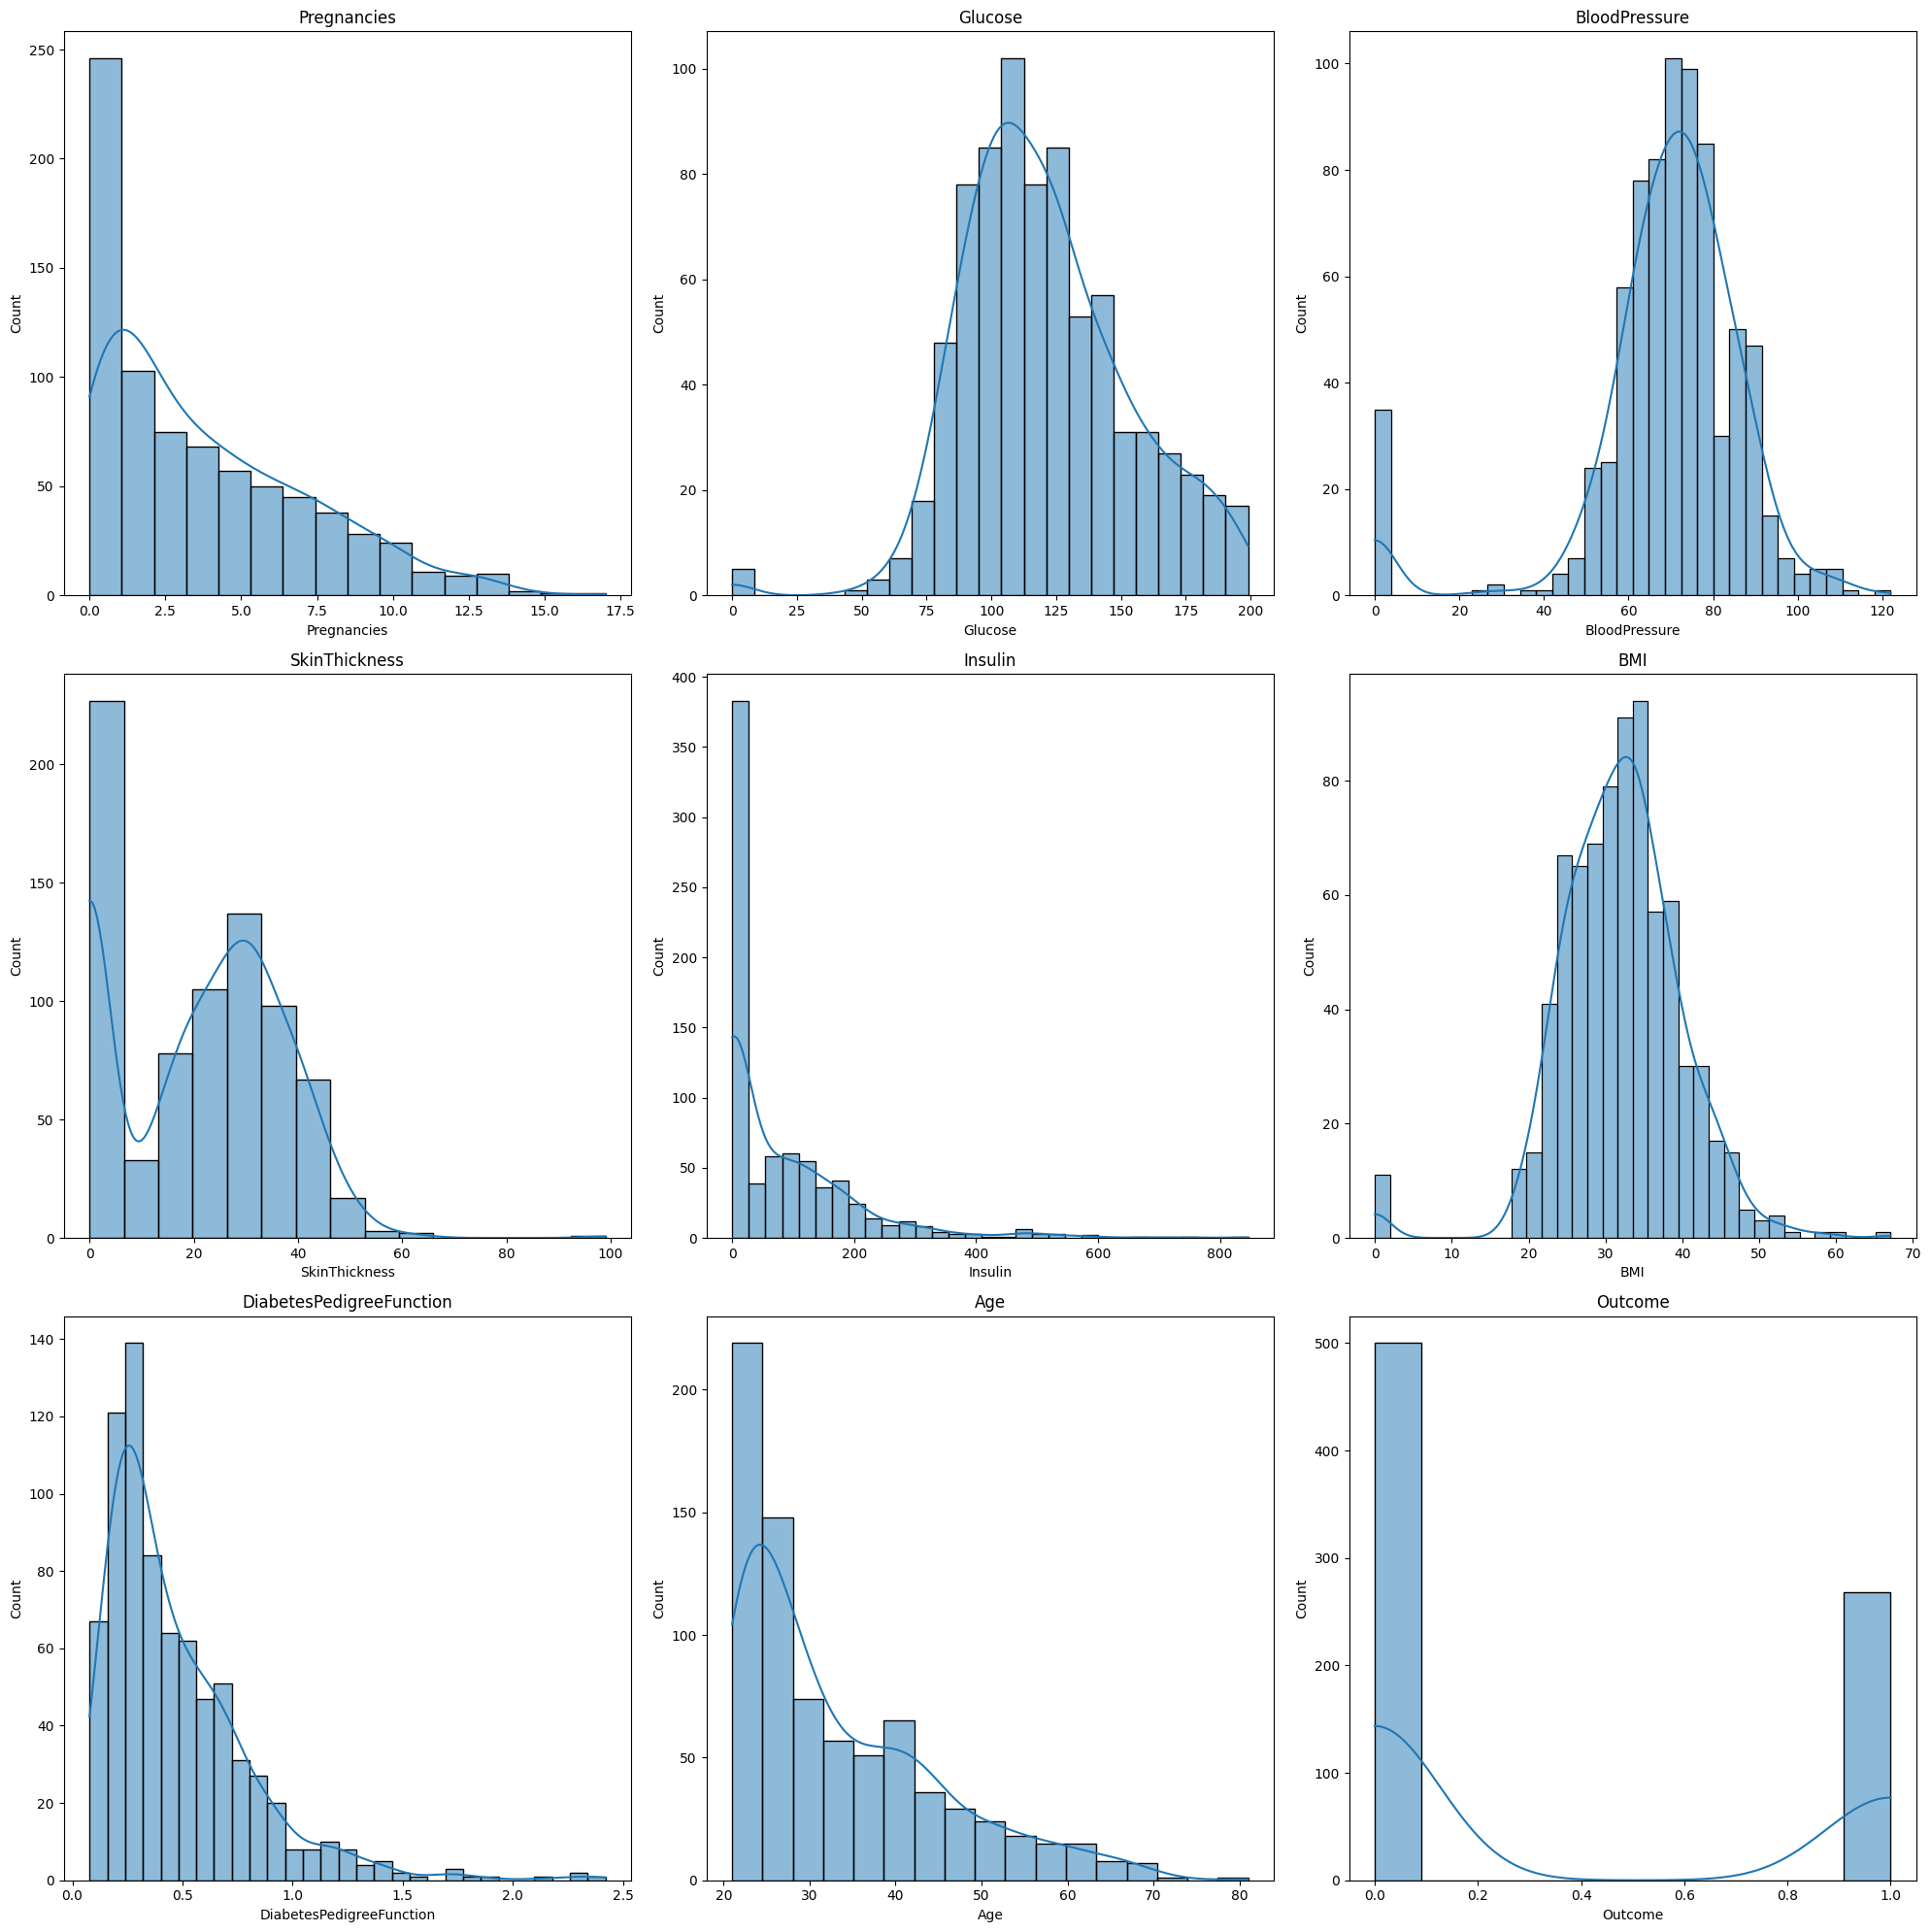

In [5]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df[column], kde=True)
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [6]:
for column in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df[column] = df[column].replace(0,np.NaN)

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

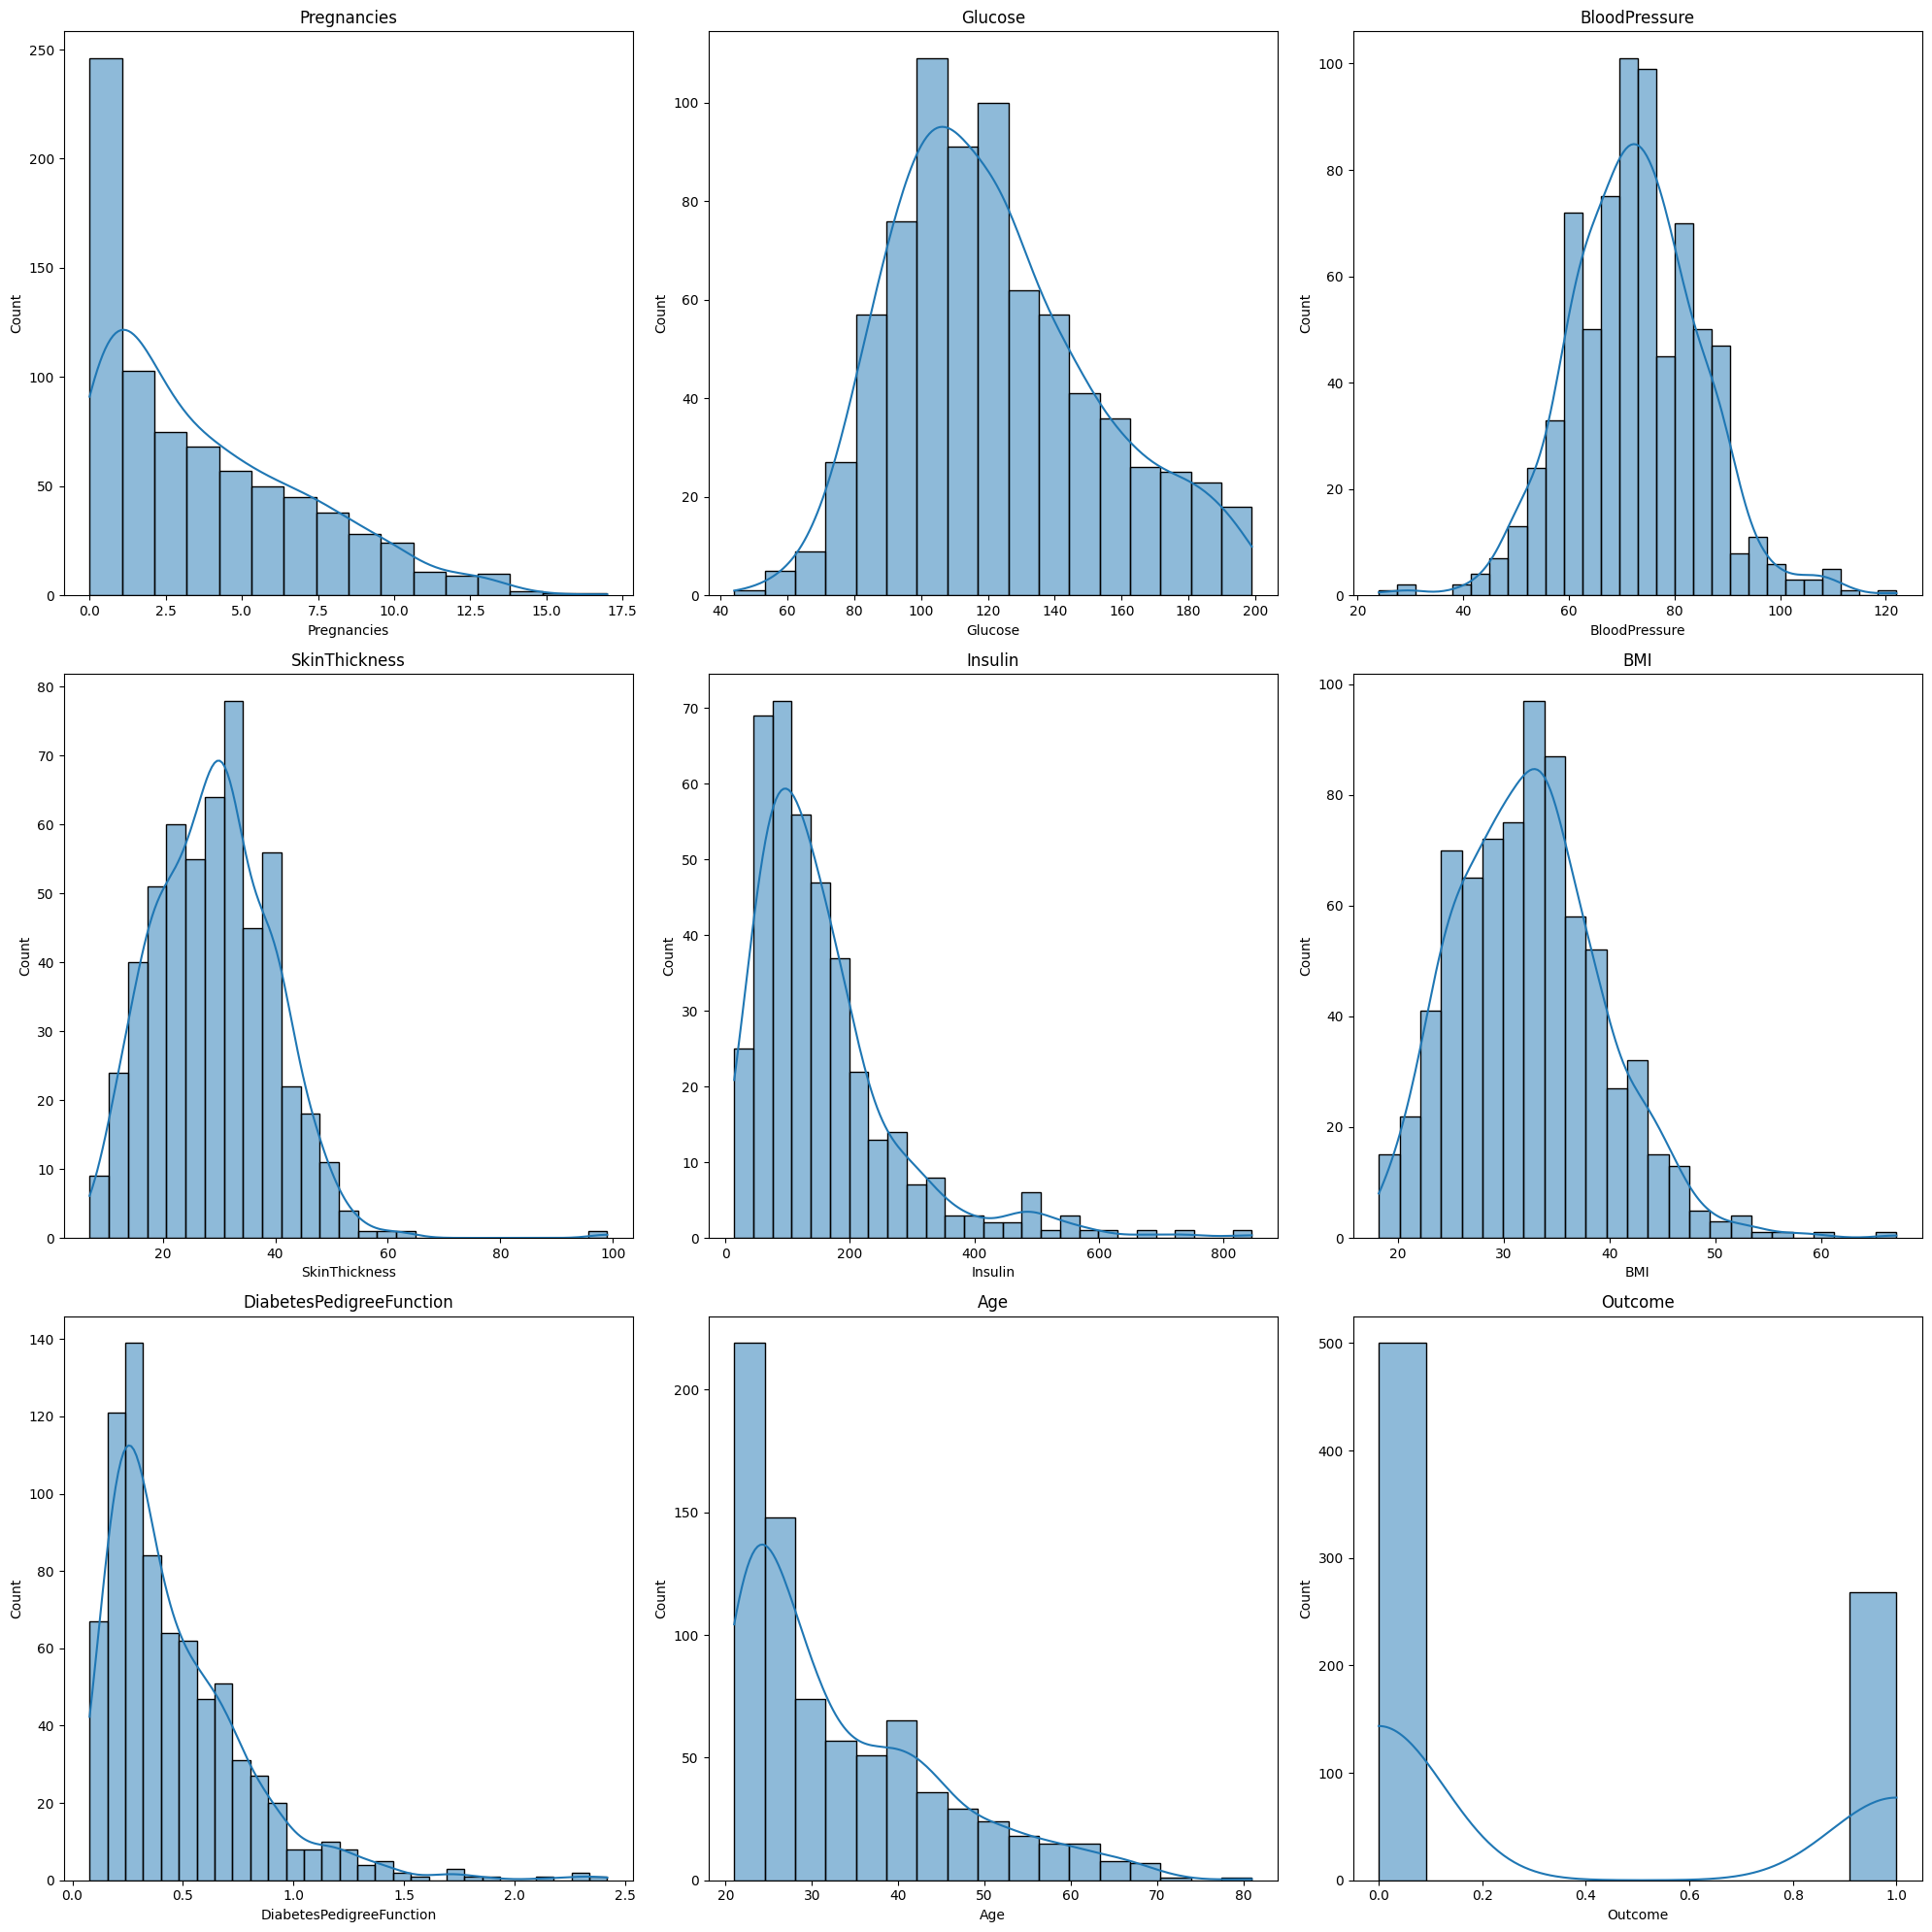

In [7]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df[column], kde=True)
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Analisando a relação entre as variáveis

### Correlação de Pearson

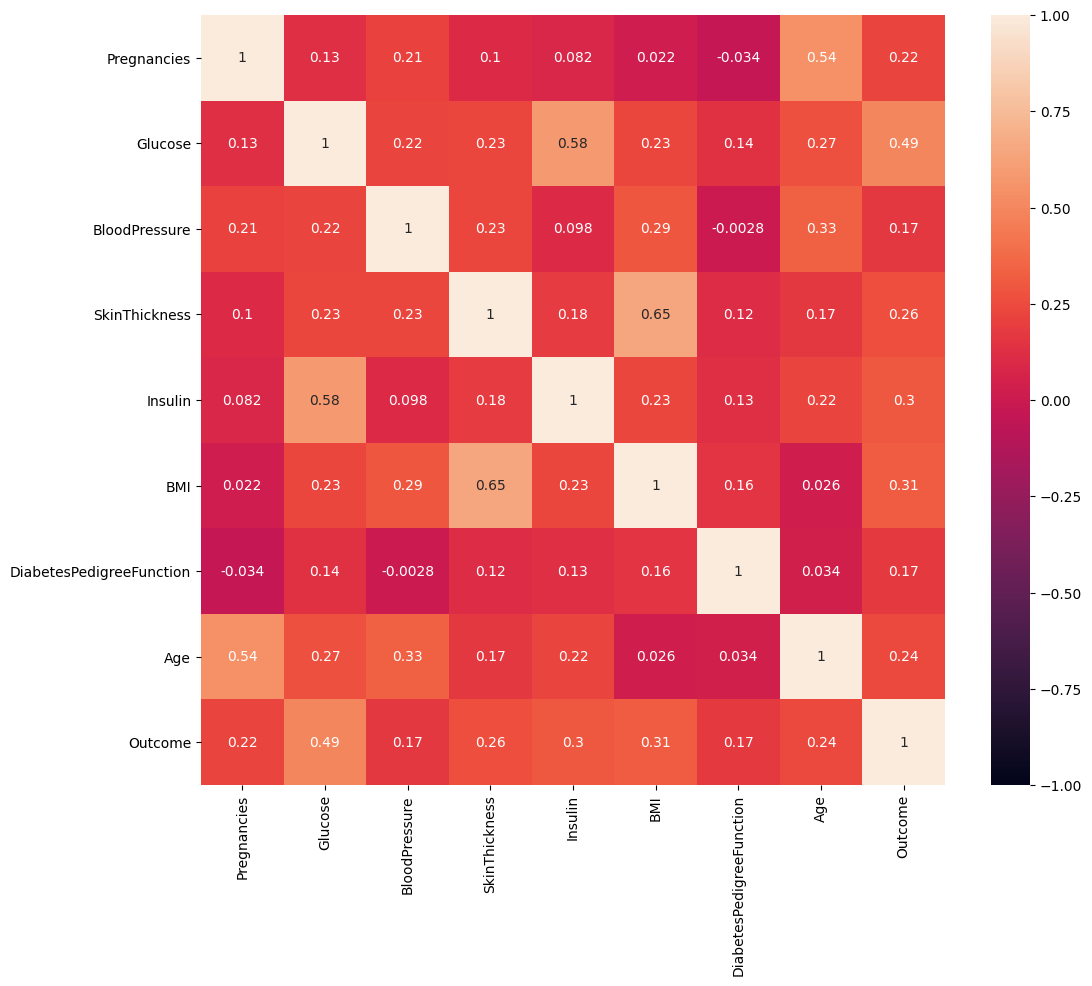

In [8]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

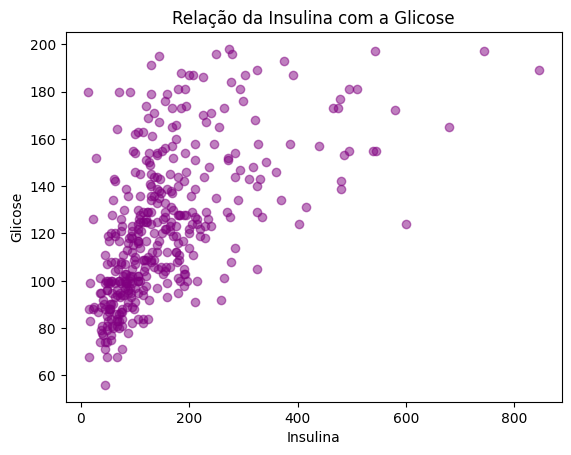

In [9]:
plt.scatter(df.Insulin,df.Glucose,color="purple",alpha=0.5)
plt.xlabel("Insulina")
plt.ylabel("Glicose")
plt.title("Relação da Insulina com a Glicose")
plt.show()

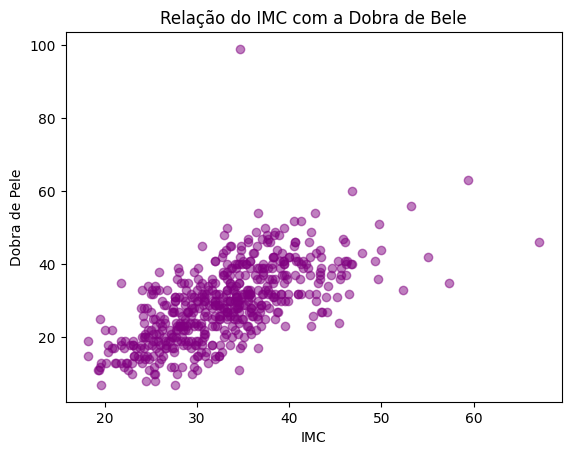

In [10]:
plt.scatter(df.BMI, df.SkinThickness, color="purple", alpha=0.5)
plt.xlabel("IMC")
plt.ylabel("Dobra de Pele")
plt.title("Relação do IMC com a Dobra de Bele")
plt.show()

# Relação de pacientes com diabetes

In [11]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

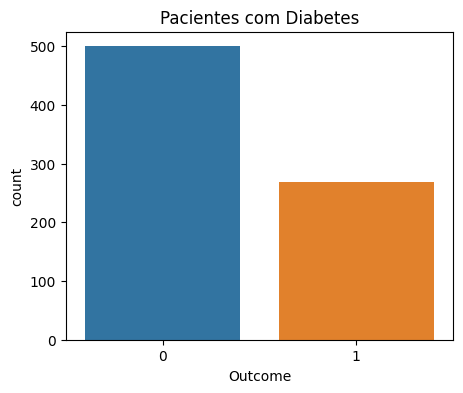

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x=df.Outcome)
plt.title("Pacientes com Diabetes")
plt.show()

# Quais fatores influenciam diabetes?

### A idade é um deles?

In [13]:
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [14]:
#create age groups
bin_edges = [20, 41, 61, 81]
df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges)

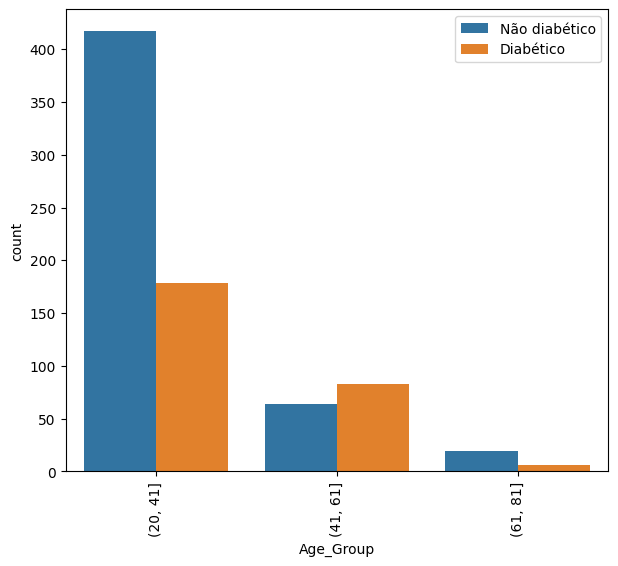

In [15]:
plt.figure(figsize=(7,6))
plt.xticks(rotation = 90)
sns.countplot(x=df['Age_Group'] , hue= df.Outcome)
plt.legend(['Não diabético','Diabético'])
plt.show()

### Qual a relação da Glicose com a Diabetes?

In [16]:
df.Glucose.describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [17]:
#create groups based on the waiting time column
bins = [40, 60, 80, 100, 120, 140, 160, 180, 200]
df['Glucose_group'] = pd.cut(df['Glucose'], bins=bins)

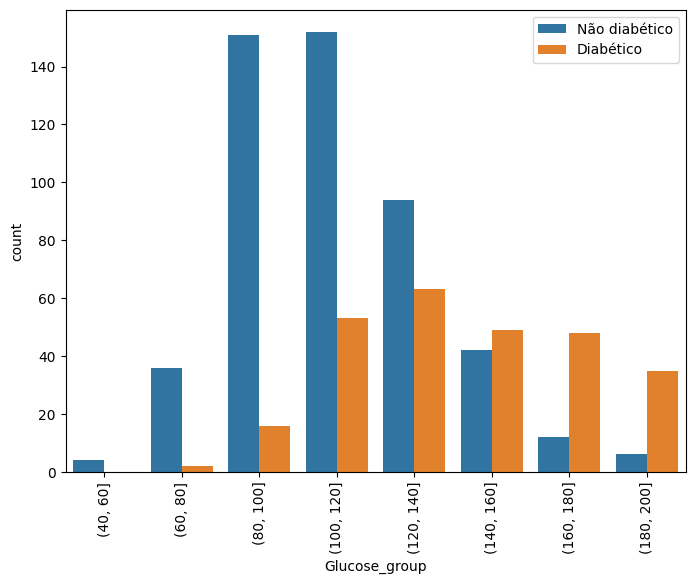

In [18]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)
sns.countplot(x= df['Glucose_group'], hue= df.Outcome)
plt.legend(['Não diabético','Diabético'])

plt.show()

### Qual a relação da Pressão Sanguínea com a Diabetes?

In [19]:
df.BloodPressure.describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [20]:
#create age groups
bin_edge = [23, 48, 73, 98, 123]
df['BloodPressure_Group'] = pd.cut(df['BloodPressure'], bins=bin_edge)

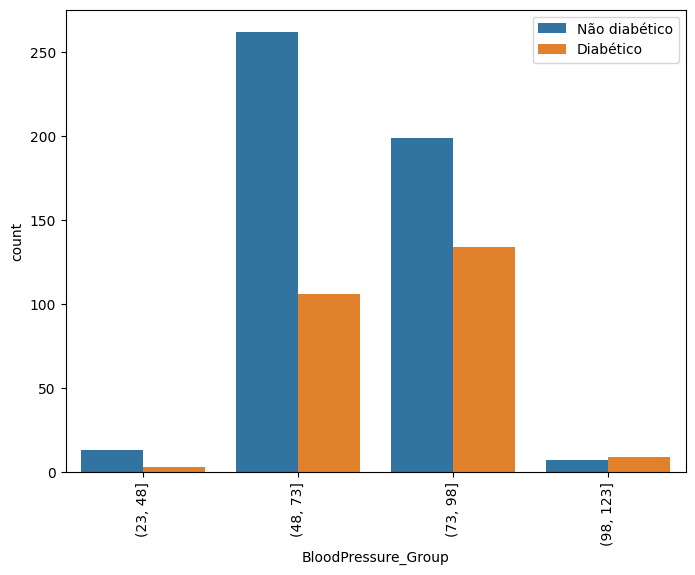

In [21]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)
sns.countplot(x= df['BloodPressure_Group'] , hue= df.Outcome)
plt.legend(['Não diabético','Diabético'])
plt.show()

### A insulina influencia a Diabetes?

In [22]:
df.Insulin.describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [23]:
bine = [0, 100, 200, 300, 400, 500, 900]
df['Insulin_Group'] = pd.cut(df['Insulin'], bins=bine)

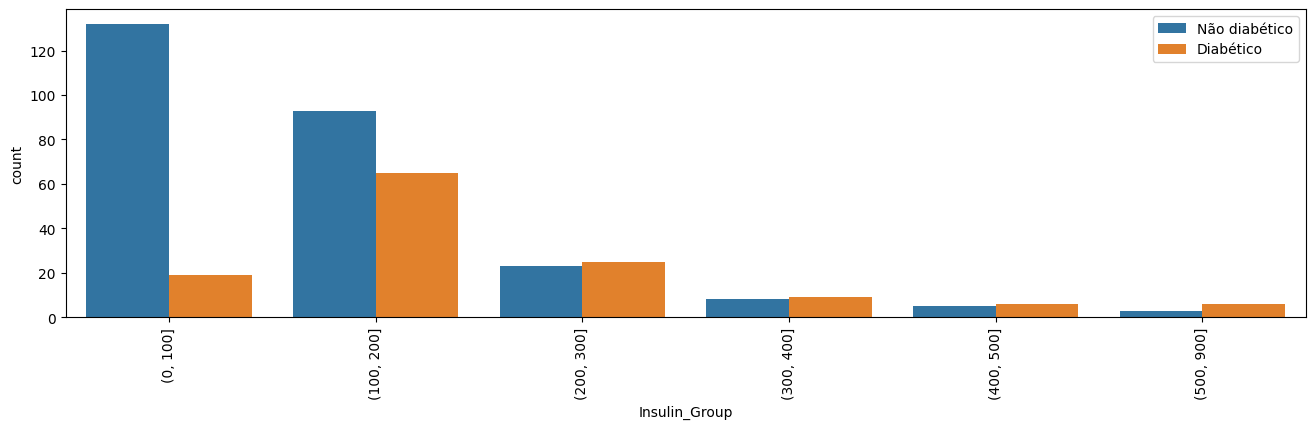

In [24]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
sns.countplot(x= df['Insulin_Group'], hue= df.Outcome)
plt.legend(['Não diabético','Diabético'])
plt.show()

# Aplicação de Modelos de ML:

In [25]:
# elimina as variáveis de grupos
# também elimina as features SkinThickness e Insulin, que possuem muitos valores nulos
df = df.drop(columns=['Age_Group', 'Glucose_group', 'BloodPressure_Group', 'Insulin_Group', 'SkinThickness', 'Insulin'])
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


              precision    recall  f1-score   support

           0       0.76      0.77      0.77       500
           1       0.56      0.54      0.55       268

    accuracy                           0.69       768
   macro avg       0.66      0.66      0.66       768
weighted avg       0.69      0.69      0.69       768



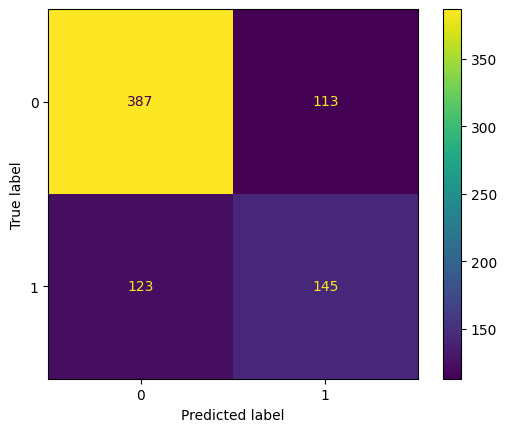

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

# Crie um pipeline que inclui o preenchimento de valores faltantes e qualquer outro pré-processamento necessário
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),  # Preenchimento de valores faltantes
    ('classifier', DecisionTreeClassifier())
])

predicted_values = cross_val_predict(
    estimator=pipeline,
    X=df.drop(columns=['Outcome']),
    y=df['Outcome'],
    cv=10
)

print(classification_report(df['Outcome'], predicted_values))

cm = confusion_matrix(y_true=df['Outcome'], y_pred=predicted_values)
disp_cm = ConfusionMatrixDisplay(cm)
disp_cm.plot()

In [31]:
from hyperopt import hp, fmin, space_eval
from sklearn.model_selection import cross_val_score

def objective(params):

    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),  # Preenchimento de valores faltantes
        ('classifier', DecisionTreeClassifier(**params))  # Classificador de sua escolha
    ])

    return 1 - cross_val_score(
        estimator=pipeline,
        X=df.drop(columns=['Outcome']),
        y=df['Outcome'],
        cv=10,
        scoring='f1_macro'
    ).mean()
    
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best = fmin(objective, space4dt, max_evals=200)

print(space_eval(space4dt, best))

TPE is being used as the default algorithm.


100%|██████████| 200/200 [00:30<00:00,  6.53trial/s, best loss: 0.27706823035965855]
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 3}


              precision    recall  f1-score   support

           0       0.81      0.78      0.79       500
           1       0.61      0.65      0.63       268

    accuracy                           0.73       768
   macro avg       0.71      0.71      0.71       768
weighted avg       0.74      0.73      0.73       768



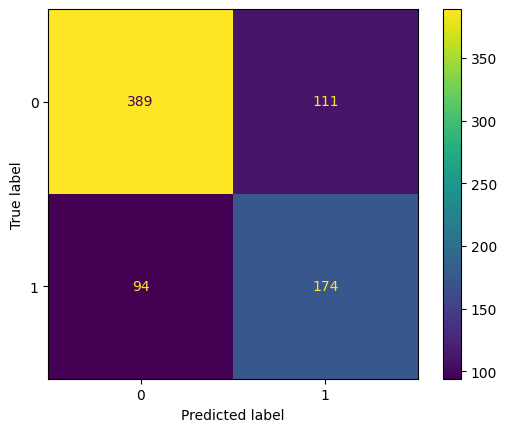

In [32]:
params = space_eval(space4dt, best)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),  # Preenchimento de valores faltantes
    ('classifier', DecisionTreeClassifier(**params))
])

predicted_values = cross_val_predict(
    estimator=pipeline,
    X=df.drop(columns=['Outcome']),
    y=df['Outcome'],
    cv=10
)

print(classification_report(df['Outcome'], predicted_values))

cm = confusion_matrix(y_true=df['Outcome'], y_pred=predicted_values)
disp_cm = ConfusionMatrixDisplay(cm)
disp_cm.plot()